# Exercício PyTorch: Gradientes e Grafo Computacional

Um dos principais fundamentos para que o PyTorch seja adequado para deep learning é a sua habilidade de
calcular o gradiente automaticamente a partir da expressões definidas. Essa facilidade é implementada
pelo tensor através do cálculo automático do gradiente pela construção dinâmica do grafo computacional.

## Grafo computacional

```
    y_pred = x * w
    e = y_pred - y
    e2 = e**2
    J = e2.sum()
```

As quatro expressões acima, para o cálculo do J pode ser representadas pelo grafo computacional visualizado a seguir: os círculos são as variáveis (tensores), os quadrados são as operações, os números em preto são os cálculos durante a execução das quatro expressões para calcular o J (forward, predict). O cálculo do gradiente, mostrado em vermelho, é calculado pela regra da cadeia, de trás para frente (backward).

<img src="https://raw.githubusercontent.com/robertoalotufo/files/master/figures/GrafoComputacional.png" width="600pt"/>

Para entender melhor o funcionamento do grafo computacional com os tensores, recomenda-se leitura em:

https://pytorch.org/docs/stable/notes/autograd.html

In [0]:
import torch

In [3]:
torch.__version__

'1.3.1'

## Se um tensor possui .requires_grad=*True*



In [10]:
y = 2 * torch.arange(0,4).float()
y

tensor([0., 2., 4., 6.])

In [11]:
x = torch.arange(0,4).float(); x

tensor([0., 1., 2., 3.])

In [0]:
w = torch.ones(1,requires_grad=True); w

tensor([1.], requires_grad=True)

## Cálculo automático do gradiente da função perda J

Seja a expressão: $$ J = \sum ((x  w) - y)^2 $$

Queremos calcular a derivada de $J$ em relação a $w$.

### Montagem do grafo computacional

In [0]:
# predict (forward)
y_pred = x * w

# cálculo da perda J: loss
e = y_pred - y
e2 = e.pow(2)
J = e2.sum()
J

tensor(14., grad_fn=<SumBackward0>)

## Auto grad - processa o grafo computacional backwards

O `backward()` varre o grafo computacional a partir da variável a ele associada e calcula o gradiente para todos os tensores que possuem o atributo `requires_grad` como verdadeiro.
O `backward()` destroi o grafo após sua execução. Isso é intrínsico ao PyTorch pelo fato dele ser uma rede dinâmica.

w.grad é o gradiente de J em relação a w.

In [0]:
J.backward()
print(w.grad)

tensor([-28.])


In [0]:
w.grad.data.zero_();

# Exercícios




1. Calcule o mesmo gradiente usando a regra das diferenças finitas, de acordo com a equação a seguir, utilizando um valor de $\Delta w$ bem pequeno.

$$ \frac{\partial J}{\partial w} = \frac{J(w + \Delta w) - J(w - \Delta w)}{2 \Delta w} $$

In [0]:
def J(w):
    # programe a função J, para facilitar
    return 

def dJ(w):
    # Cálculo da derivada de J em relação a w usando diferenças finitas
    return

2. Calcule as derivadas primeira, segunda, terceira e quarta, da função tangente hiperbólica

[Veja o exemplo 1: Derivatives of a function](https://colindcarroll.com/2019/04/06/exercises-in-automatic-differentiation-using-autograd-and-jax/)

A seguir está o plot da tangente hiperbólica:

In [0]:
import matplotlib.pyplot as plt
import numpy as np

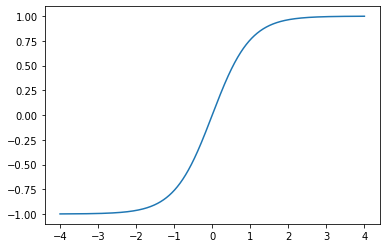

In [16]:
x = np.linspace(-4, 4, 1000)
plt.plot(x,np.tanh(x))

2a) Calcule as derivadas primeira, segunda, terceira e quarta da tangente hiperbólica conforme a figura do exemplo do link, usando o cálculo da derivada por diferenças finitas.

In [0]:
# Solução usando derivada por diferenças finitas




2b) Repita o exercício anterior, porém usando agora o cálculo da derivada, a facilidade do autograd do PyTorch, isto é, utilize o ``.backward()`` do PyTorch para calcular o gradiente na repetição do exercício anterior.

In [0]:
# Solução usando derivada pelo autograd do PyTorch